In [ ]:
# code for preprocessing

In [ ]:
import cv2
import os

def preprocess_image(image_path, output_directory):
    # Load the image
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Normalize the size (assuming desired size is 300x300 pixels)
    new_height = 500
    new_width = 500
    normalized_img = cv2.resize(gray_img, (new_width, new_height))

    # Remove noise using GaussianBlur
    blurred_img = cv2.GaussianBlur(normalized_img, (5, 5), 0)

    # Save the preprocessed image
    output_path = os.path.join(output_directory, os.path.basename(image_path))
    cv2.imwrite(output_path, blurred_img)

    return output_path

# Set the input and output directories
input_directory = 'Images'
output_directory = 'preprocessed_images1'
os.makedirs(output_directory, exist_ok=True)

# Process all images in the input directory
for filename in os.listdir(input_directory):
    if filename.endswith(".jpg"):  # Assuming all images are in PNG format
        image_path = os.path.join(input_directory, filename)
        preprocess_image(image_path, output_directory)

print("Preprocessing complete.")

folder creation

In [ ]:
from PIL import Image
import os

def extract_characters(main_folder, output_directory, num_rows, num_cols):
    # Create a dictionary to store characters by row and column
    characters_dict = {}

    for filename in os.listdir(main_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(main_folder, filename)
            characters_dict = extract_characters_from_image(image_path, characters_dict, num_rows, num_cols)

    # Save characters to the output directory
    save_characters(output_directory, characters_dict)

def extract_characters_from_image(image_path, characters_dict, num_rows, num_cols):
    try:
        img = Image.open(image_path)
    except Exception as e:
        print(f"Error opening image {image_path}: {e}")
        return characters_dict

    width, height = img.size
    cell_width = width // num_cols
    cell_height = height // num_rows

    for i in range(num_rows):
        for j in range(num_cols):
            x1 = j * cell_width
            y1 = i * cell_height
            x2 = (j + 1) * cell_width
            y2 = (i + 1) * cell_height

            character = img.crop((x1, y1, x2, y2)).copy()

            # Store characters in the dictionary by row and column
            key = (i + 1, j + 1)
            if key not in characters_dict:
                characters_dict[key] = []
            characters_dict[key].append(character)

    return characters_dict

def save_characters(output_directory, characters_dict):
    for key, characters_list in characters_dict.items():
        row, col = key
        row_col_folder = os.path.join(output_directory, f"row_{row}col{col}")
        os.makedirs(row_col_folder, exist_ok=True)

        for idx, character in enumerate(characters_list, start=1):
            character.save(os.path.join(row_col_folder, f"character_{idx}.png"))

# Example usage with main folder and output directory
main_folder_path = 'preprocessed_images1'
output_directory = 'output_gray_images1'
num_rows = 6
num_cols = 9

# Extract characters from all images in the main folder
extract_characters(main_folder_path, output_directory, num_rows, num_cols)

Binarization

In [2]:
from PIL import Image
import os

def binarize_image(input_path, output_path, threshold=128):
    try:
        # Open the image file
        image = Image.open(input_path)

        # Convert the image to grayscale
        grayscale_image = image.convert("L")

      
        
        # Binarize the image using a specified threshold
        binary_image = grayscale_image.point(lambda pixel: 0 if pixel < threshold else 255)

        # Save the binarized image
        binary_image.save(output_path)

    except Exception as e:
        print(f"Error processing image: {e}")

def binarize_images_in_folder(folder_path, output_folder, threshold=100):
    # Iterate through subfolders in the input folder
    for character_folder in os.listdir(folder_path):
        character_folder_path = os.path.join(folder_path, character_folder)

        # Ensure that the item is a directory
        if os.path.isdir(character_folder_path):
            # Create a corresponding subfolder in the output folder
            output_character_folder = os.path.join(output_folder, character_folder)
            os.makedirs(output_character_folder, exist_ok=True)

            # Iterate through images in the character subfolder
            for image_filename in os.listdir(character_folder_path):
                image_path = os.path.join(character_folder_path, image_filename)
                output_image_path = os.path.join(output_character_folder, image_filename)

                # Binarize the image and save the result
                binarize_image(image_path, output_image_path, threshold)

if __name__ == "__main__":
    # Set your input folder and output folder
    input_folder_path = "output_gray_images1"  # Change this to your input folder path
    output_folder_path = "binarized_images4"  # Change this to your output folder path

    # Specify the binarization threshold (adjust as needed)
    binarization_threshold = 228

    # Binarize images in the input folder and save the results in the output folder
    binarize_images_in_folder(input_folder_path, output_folder_path, binarization_threshold)


In [ ]:
import os
import cv2

def resize_images_in_folders(input_root_folder, output_root_folder, target_size):
    for root, dirs, files in os.walk(input_root_folder):
        for file in files:
            input_path = os.path.join(root, file)

            # Ensure the output subfolder exists
            output_subfolder = os.path.relpath(root, input_root_folder)
            output_subfolder_path = os.path.join(output_root_folder, output_subfolder)
            os.makedirs(output_subfolder_path, exist_ok=True)

            try:
                # Open the image
                original_image = cv2.imread(input_path)

                # Resize the image
                resized_image = cv2.resize(original_image, target_size)

                # Save the resized image
                output_path = os.path.join(output_subfolder_path, file)
                cv2.imwrite(output_path, resized_image)

            except Exception as e:
                print(f"Error processing image {input_path}: {e}")

if _name_ == "_main_":
    # Set your input folder, output folder, and target size
    input_folder = "binarized_images4"  # Change this to your input images folder path
    output_folder = "output_resized_images"  # Change this to your output folder for resized images
    target_size = (100, 100)  # Set the target size (width, height)

    # Resize images in the specified folders
    resize_images_in_folders(input_folder, output_folder, target_size)

In [ ]:
import os
import cv2

def crop_images_in_folders(input_root_folder, output_root_folder, crop_area):
    for root, dirs, files in os.walk(input_root_folder):
        for file in files:
            input_path = os.path.join(root, file)
            
            # Ensure the output subfolder exists
            output_subfolder = os.path.relpath(root, input_root_folder)
            output_subfolder_path = os.path.join(output_root_folder, output_subfolder)
            os.makedirs(output_subfolder_path, exist_ok=True)

            try:
                # Open the image
                original_image = cv2.imread(input_path)

                # Crop the image
                cropped_image = original_image[crop_area[1]:crop_area[3], crop_area[0]:crop_area[2]]

                # Save the cropped image
                output_path = os.path.join(output_subfolder_path, file)
                cv2.imwrite(output_path, cropped_image)

            except Exception as e:
                print(f"Error processing image {input_path}: {e}")

if _name_ == "_main_":
    # Set your input folder, output folder, and crop area
    input_folder = "output_resized_images"  # Change this to your input images folder path
    output_folder = "output_cropped_images"  # Change this to your output folder for cropped images
    crop_area = (10, 10, 90, 90)  # Adjust the crop area (left, top, right, bottom) as needed

    # Crop images in the specified folders
    crop_images_in_folders(input_folder, output_folder, crop_area)

In [ ]:
import os
import cv2

def resize_images_in_folders(input_root_folder, output_root_folder, target_size):
    for root, dirs, files in os.walk(input_root_folder):
        for file in files:
            input_path = os.path.join(root, file)

            # Ensure the output subfolder exists
            output_subfolder = os.path.relpath(root, input_root_folder)
            output_subfolder_path = os.path.join(output_root_folder, output_subfolder)
            os.makedirs(output_subfolder_path, exist_ok=True)

            try:
                # Open the image
                original_image = cv2.imread(input_path)

                # Resize the image
                resized_image = cv2.resize(original_image, target_size)

                # Save the resized image
                output_path = os.path.join(output_subfolder_path, file)
                cv2.imwrite(output_path, resized_image)

            except Exception as e:
                print(f"Error processing image {input_path}: {e}")

if _name_ == "_main_":
    # Set your input folder, output folder, and target size
    input_folder = "output_cropped_images"  # Change this to your input images folder path
    output_folder = "output_resized"  # Change this to your output folder for resized images
    target_size = (100, 100)  # Set the target size (width, height)

    # Resize images in the specified folders
    resize_images_in_folders(input_folder, output_folder, target_size)

In [ ]:
import cv2
import os
import numpy as np

def augment_images_with_translation_and_slant(input_folder, output_folder):
    for root, dirs, files in os.walk(input_folder):
        for file in files:
            input_path = os.path.join(root, file)
            output_subfolder = os.path.relpath(root, input_folder)

            # Ensure the output subfolder exists
            output_subfolder_path = os.path.join(output_folder, output_subfolder)
            os.makedirs(output_subfolder_path, exist_ok=True)

            try:
                # Read the image
                original_image = cv2.imread(input_path)

                # Get image dimensions
                height, width, _ = original_image.shape

                # Define the translation distances for left and right
                left_translation = int(0.2 * width)
                right_translation = int(0.2 * width)

                # Define translation matrices
                left_translation_matrix = np.float32([[1, 0, -left_translation], [0, 1, 0]])
                right_translation_matrix = np.float32([[1, 0, right_translation], [0, 1, 0]])

                # Apply left translation
                left_translated_image = cv2.warpAffine(original_image, left_translation_matrix, (width, height), borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255))

                # Apply right translation
                right_translated_image = cv2.warpAffine(original_image, right_translation_matrix, (width, height), borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255))

                # Save the original image
                original_output_path = os.path.join(output_subfolder_path, f"original_{file}")
                cv2.imwrite(original_output_path, original_image)

                # Save left tilted images with four different slant ranges for +45 degrees
                for slant_range in [0.01, 0.02, 0.03, 0.04]:
                    left_tilted_image = cv2.warpAffine(left_translated_image, cv2.getRotationMatrix2D((width / 2, height / 2), 45, 1), (width, height), borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255))
                    left_tilted_output_path = os.path.join(output_subfolder_path, f"left_tilted_45_{slant_range}_{file}")
                    cv2.imwrite(left_tilted_output_path, left_tilted_image)

                # Save right tilted images with four different slant ranges for -45 degrees
                for slant_range in [0.01, 0.02, 0.03, 0.04]:
                    right_tilted_image = cv2.warpAffine(right_translated_image, cv2.getRotationMatrix2D((width / 2, height / 2), -45, 1), (width, height), borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255))
                    right_tilted_output_path = os.path.join(output_subfolder_path, f"right_tilted_-45_{slant_range}_{file}")
                    cv2.imwrite(right_tilted_output_path, right_tilted_image)

            except Exception as e:
                print(f"Error processing image {input_path}: {e}")

if _name_ == "_main_":
    # Set your input folder and output folder for images
    input_folder = "output_resized"  # Change this to your input images folder path
    output_folder = "aug_resized_images"  # Change this to your output folder for augmented images

    # Augment the images with left and right translations, and left and right tilts, and save the results
    augment_images_with_translation_and_slant(input_folder, output_folder)

EDA techniques

1) dataset overview

In [39]:
# Count the number of images in the dataset
total_images = sum(len(files) for _, _, files in os.walk('Images'))

# Display the total number of images
print(f"Total Number of Images: {total_images}")

# Display the distribution of images across rows and columns
for folder_name in os.listdir('Images'):
    folder_path = os.path.join('Images', folder_name)
    if os.path.isdir(folder_path):
        num_images = len(os.listdir(folder_path))
        print(f"Folder: {folder_name}, Number of Images: {num_images}")


Total Number of Images: 112


2. intensity size distribution

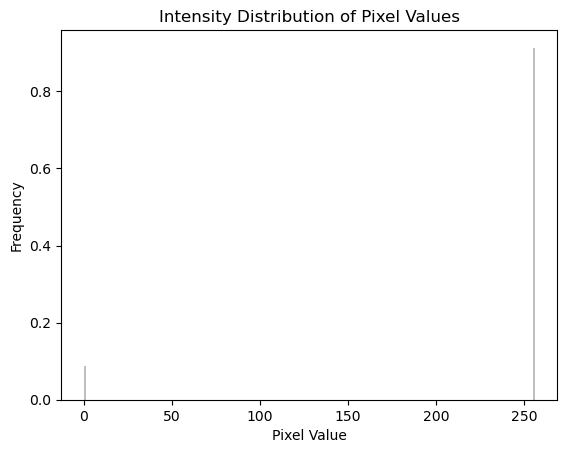

In [23]:
for folder_name in os.listdir('binarized_images1'):
    folder_path = os.path.join('binarized_images1', folder_name)
    if os.path.isdir(folder_path):
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            try:
                img = Image.open(image_path)
                pixel_values.extend(list(img.getdata()))
            except Exception as e:
                print(f"Error processing image {image_path}: {e}")


# Plot a histogram of pixel values
plt.hist(pixel_values, bins=256, range=(0, 256), density=True, alpha=0.5, color='gray')

plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Intensity Distribution of Pixel Values')
plt.show()


Binarized Image Analysis

C:\Users\manis\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


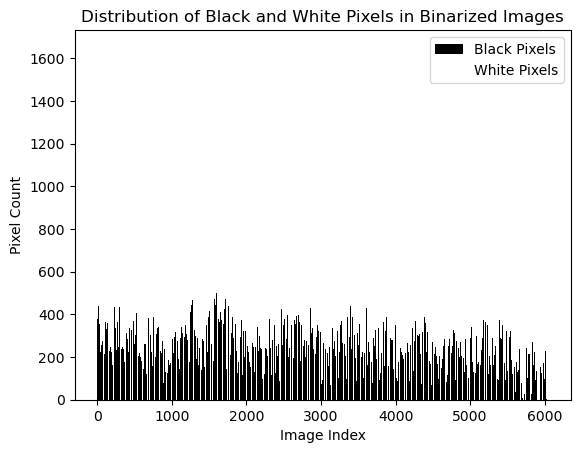

In [40]:
# Display the distribution of black and white pixels in binarized images
black_pixels = []
white_pixels = []

for folder_name in os.listdir('binarized_images3'):
    folder_path = os.path.join('binarized_images3', folder_name)
    if os.path.isdir(folder_path):
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            binarized_img = Image.open(image_path)
            pixel_values = list(binarized_img.getdata())
            black_pixels.append(pixel_values.count(0))
            white_pixels.append(pixel_values.count(255))

# Plot a stacked bar chart of black and white pixels
plt.bar(range(len(black_pixels)), black_pixels, color='black', label='Black Pixels')
plt.bar(range(len(white_pixels)), white_pixels, color='white', label='White Pixels', bottom=black_pixels)
plt.xlabel('Image Index')
plt.ylabel('Pixel Count')
plt.title('Distribution of Black and White Pixels in Binarized Images')
plt.legend()
plt.show()


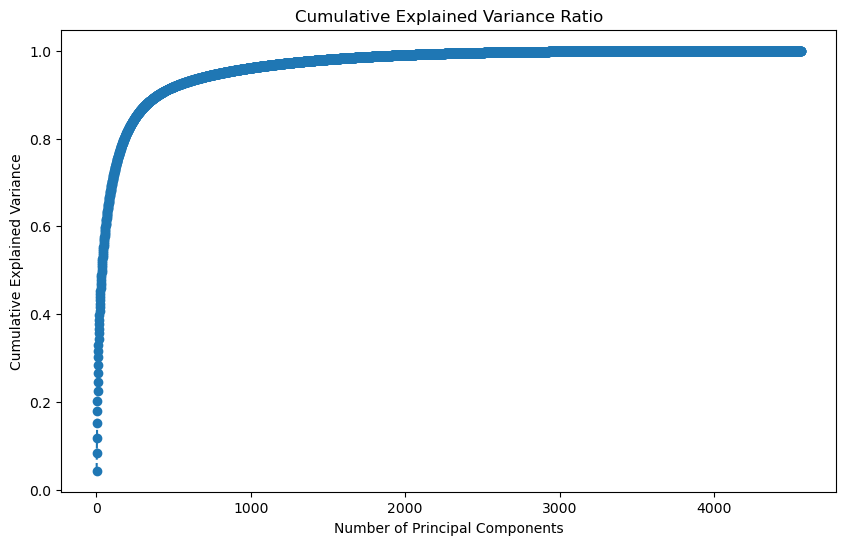

In [2]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Function to load and flatten binarized images from all subfolders in a folder
def load_images_from_folder(main_folder):
    images = []
    for folder_name in os.listdir(main_folder):
        folder_path = os.path.join(main_folder, folder_name)
        
        if os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                img_path = os.path.join(folder_path, filename)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                
                if img is not None:
                    # Flatten the image into a 1D array
                    img_flat = img.flatten()
                    images.append(img_flat)
    
    return np.array(images)

# Set your binarized images main folder
main_folder_path = 'binarized_images3'

# Load binarized images from all subfolders and flatten them
X = load_images_from_folder(main_folder_path)

# Check if X is empty
if X.shape[0] == 0:
    print("No images found or X is empty. Please check your data loading process.")
else:
    # Standardize the pixel values
    scaler = StandardScaler()

    # Reshape X if it's 1D
    if len(X.shape) == 1:
        X = X.reshape(-1, 1)

    X_scaled = scaler.fit_transform(X)

    # Apply PCA
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)

    # Plot the explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_explained_variance = explained_variance_ratio.cumsum()

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
    plt.title('Cumulative Explained Variance Ratio')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.show()

   
   